In [278]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Загружаем изображение:

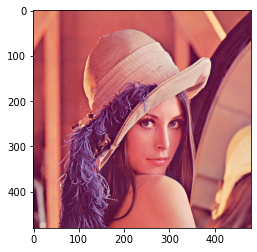

In [279]:
image = cv2.imread("E:\lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

 Находим лицо на изображении:

In [280]:
path = 'E:\Anaconda\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray_image, 1.1, 5)
face.shape

(1, 4)

Обрезаем изображение, чтобы получить только лицо:

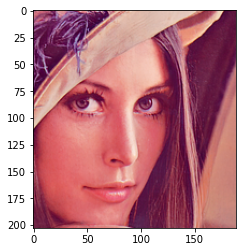

In [281]:
crop_image = image[face[0][2]:face[0][0] + face[0][3], face[0][0]:face[0][0] + face[0][1]] 

plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

С помощью метода Кенни получаем границы обьектов:

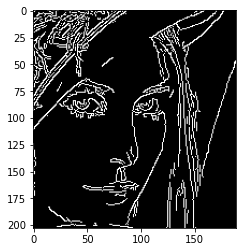

In [282]:
gray_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)
bounds = cv2.Canny(gray_image, 100, 200)

plt.imshow(bounds,cmap="gray")

Удаляем мелкие границы на изображении, длина и ширина которых меньше 10:

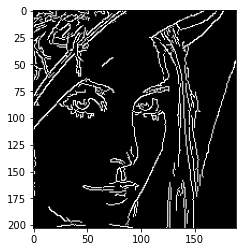

In [283]:
w, h = bounds.shape

numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(bounds, 4)
for x in range(0, w):
    for y in range(0, h):
        if stats[labels[x, y], cv2.CC_STAT_WIDTH] < 10 and stats[labels[x, y], cv2.CC_STAT_HEIGHT] < 10:
            bounds[x, y] = 0
            
plt.imshow(bounds, cmap="gray")

Применяем операцию расширения:

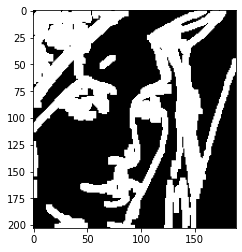

In [284]:
kernel = np.ones((5, 5), dtype=np.uint8)
dilated = cv2.dilate(bounds, kernel, 1)

plt.imshow(dilated,cmap="gray")

Применяем фильтр Гаусса и нормализуем полученное изображение:

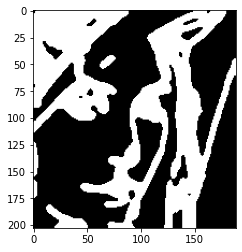

In [285]:
arr = np.array([])
blur = cv2.GaussianBlur(dilated, (5,5), cv2.BORDER_DEFAULT)
M = cv2.normalize(blur, arr, 0, 1, cv2.NORM_MINMAX)

plt.imshow(M, cmap="gray")

Применяем билатеральный фильтр:

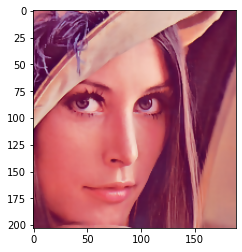

In [286]:
F1 = cv2.bilateralFilter(crop_image, 5, 50, 100)

plt.imshow(cv2.cvtColor(F1, cv2.COLOR_BGR2RGB))

Повышаем контрастность изображения:

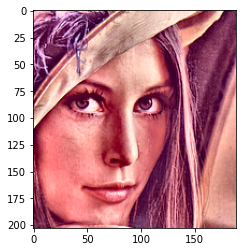

In [287]:
clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(crop_image, cv2.COLOR_BGR2LAB)  
l, a, b = cv2.split(lab)  

l2 = clahe.apply(l)  

lab = cv2.merge((l2,a,b))  
F2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(cv2.cvtColor(F2, cv2.COLOR_BGR2RGB))

Осуществляем финальную фильтрацию:

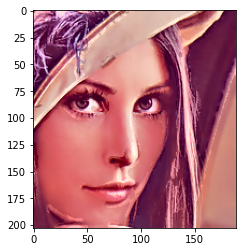

In [288]:
result = np.zeros(crop_image.shape, dtype=np.uint8)
w, h, channel = result.shape

for x in range(0, w):
    for y in range(0, h):
        for c in range(0, channel):
            result[x, y, c] = M[x, y] * F2[x, y, c] + (1 - M[x, y]) * F1[x, y, c]
            
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))